In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import netCDF4 as nc
import seaborn as sns
import matplotlib.colors as mcolors
import glob
import os
import xarray as xr
import datetime
from salishsea_tools import viz_tools, tidetools, geo_tools, gsw_calls, wind_tools
import pickle
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches
import h5py
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%matplotlib inline

In [25]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [26]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>

<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [8]:
SOG350high = nc.Dataset('/ocean/vdo/MIDOSS/results/fakewinds/SOG/Lagrangian_AKNS_crude_fakewinds_04may16.nc', 'r')
SOG350low = nc.Dataset('/ocean/vdo/MIDOSS/results/fakewinds/SOG/Lagrangian_AKNS_crude_fakewinds_05aug17.nc', 'r')
SOG150high = nc.Dataset('/ocean/vdo/MIDOSS/results/fakewinds/SOG/Lagrangian_AKNS_crude_fakewinds_11may17.nc', 'r')
SOG150low = nc.Dataset('/ocean/vdo/MIDOSS/results/fakewinds/SOG/Lagrangian_AKNS_crude_fakewinds_13nov17.nc', 'r')

In [2]:
SOG350highw = h5py.File('/ocean/vdo/MIDOSS/mohid-forcing/SOG/fakewinds_01may16/04jan20-11jan20/winds.hdf5', 'r')
SOG350loww = h5py.File('/ocean/vdo/MIDOSS/mohid-forcing/SOG/fakewinds_02aug17/04jan20-11jan20/winds.hdf5', 'r')
SOG150highw = h5py.File('/ocean/vdo/MIDOSS/mohid-forcing/SOG/fakewinds_08may17/04jan20-11jan20/winds.hdf5', 'r')
SOG150loww = h5py.File('/ocean/vdo/MIDOSS/mohid-forcing/SOG/fakewinds_10nov17/04jan20-11jan20/winds.hdf5', 'r')

In [27]:
TP350high = nc.Dataset('/ocean/vdo/MIDOSS/results/fakewinds/TP/Lagrangian_AKNS_crude_fakewinds_TP_20nov17.nc', 'r')
TP350low = nc.Dataset('/ocean/vdo/MIDOSS/results/fakewinds/TP/Lagrangian_AKNS_crude_fakewinds_TP_31may18.nc', 'r')
TP150high = nc.Dataset('/ocean/vdo/MIDOSS/results/fakewinds/TP/Lagrangian_AKNS_crude_fakewinds_TP_17nov15.nc', 'r')
TP150low = nc.Dataset('/ocean/vdo/MIDOSS/results/fakewinds/TP/Lagrangian_AKNS_crude_fakewinds_TP_13oct18.nc', 'r')

In [28]:
TP350highw = h5py.File('/ocean/vdo/MIDOSS/mohid-forcing/TP/fakewinds_20nov17/04jan20-11jan20/winds.hdf5', 'r')
TP350loww = h5py.File('/ocean/vdo/MIDOSS/mohid-forcing/TP/fakewinds_31may18/04jan20-11jan20/winds.hdf5', 'r')
TP150highw = h5py.File('/ocean/vdo/MIDOSS/mohid-forcing/TP/fakewinds_17nov15/04jan20-11jan20/winds.hdf5', 'r')
TP150loww = h5py.File('/ocean/vdo/MIDOSS/mohid-forcing/TP/fakewinds_13oct18/04jan20-11jan20/winds.hdf5', 'r')

In [29]:
SB350high = nc.Dataset('/ocean/vdo/MIDOSS/results/fakewinds/SB/Lagrangian_AKNS_crude_fakewinds_SB_26dec16.nc', 'r')
SB350low = nc.Dataset('/ocean/vdo/MIDOSS/results/fakewinds/SB/Lagrangian_AKNS_crude_fakewinds_SB_13oct18.nc', 'r')
SB150high = nc.Dataset('/ocean/vdo/MIDOSS/results/fakewinds/SB/Lagrangian_AKNS_crude_fakewinds_SB_26jun16.nc', 'r')
SB150low = nc.Dataset('/ocean/vdo/MIDOSS/results/fakewinds/SB/Lagrangian_AKNS_crude_fakewinds_SB_02aug18.nc', 'r')

In [30]:
SB350highw = h5py.File('/ocean/vdo/MIDOSS/mohid-forcing/SB/fakewinds_26dec16/04jan20-11jan20/winds.hdf5', 'r')
## reusing TP forcing files because for wind event
SB350loww = h5py.File('/ocean/vdo/MIDOSS/mohid-forcing/TP/fakewinds_13oct18/04jan20-11jan20/winds.hdf5', 'r')
SB150highw = h5py.File('/ocean/vdo/MIDOSS/mohid-forcing/SB/fakewinds_26jun16/04jan20-11jan20/winds.hdf5', 'r')
SB150loww = h5py.File('/ocean/vdo/MIDOSS/mohid-forcing/SB/fakewinds_02aug18/04jan20-11jan20/winds.hdf5', 'r')

In [31]:
BP350high = nc.Dataset('/ocean/vdo/MIDOSS/results/fakewinds/BP/Lagrangian_AKNS_crude_fakewinds_BP_01may16.nc', 'r')
BP350low = nc.Dataset('/ocean/vdo/MIDOSS/results/fakewinds/BP/Lagrangian_AKNS_crude_fakewinds_BP_13oct18.nc', 'r')
BP150high = nc.Dataset('/ocean/vdo/MIDOSS/results/fakewinds/BP/Lagrangian_AKNS_crude_fakewinds_BP_20nov17.nc', 'r')
BP150low = nc.Dataset('/ocean/vdo/MIDOSS/results/fakewinds/BP/Lagrangian_AKNS_crude_fakewinds_BP_19jul15.nc', 'r')

In [32]:
## reusing TP and SOG forcing files because for wind events
BP350highw = h5py.File('/ocean/vdo/MIDOSS/mohid-forcing/SOG/fakewinds_01may16/04jan20-11jan20/winds.hdf5', 'r')
BP350loww = h5py.File('/ocean/vdo/MIDOSS/mohid-forcing/TP/fakewinds_13oct18/04jan20-11jan20/winds.hdf5', 'r')
BP150highw = h5py.File('/ocean/vdo/MIDOSS/mohid-forcing/TP/fakewinds_20nov17/04jan20-11jan20/winds.hdf5', 'r')
BP150loww = h5py.File('/ocean/vdo/MIDOSS/mohid-forcing/BP/fakewinds_19jul15/04jan20-11jan20/winds.hdf5', 'r')

In [9]:
SOGzero = nc.Dataset('/ocean/vdo/MIDOSS/results/fakewinds/zerowinds/Lagrangian_AKNS_crude_fakewinds_zerowinds_SOG.nc')
TPzero = nc.Dataset('/ocean/vdo/MIDOSS/results/fakewinds/zerowinds/Lagrangian_AKNS_crude_fakewinds_zerowinds_TP.nc')
SBzero = nc.Dataset('/ocean/vdo/MIDOSS/results/fakewinds/zerowinds/Lagrangian_AKNS_crude_fakewinds_zerowinds_SB.nc')
BPzero = nc.Dataset('/ocean/vdo/MIDOSS/results/fakewinds/zerowinds/Lagrangian_AKNS_crude_fakewinds_zerowinds_BP.nc')

In [5]:
zerow = h5py.File('/ocean/vdo/MIDOSS/mohid-forcing/zero_winds/04jan20-11jan20/winds.hdf5', 'r')

In [7]:
SOGs0 = np.array([])
SOGs1 = np.array([])
SOGs2 = np.array([])
SOGs3 = np.array([])
SOGs4 = np.array([])

SOGd0 = np.array([])
SOGd1 = np.array([])
SOGd2 = np.array([])
SOGd3 = np.array([])
SOGd4 = np.array([])

for keyX, keyY in zip(list(SOG350highw['Results']['wind velocity X'].keys())[:24], list(SOG150highw['Results']['wind velocity Y'].keys())[:24]):
    s, d = wind_tools.wind_speed_dir(SOG350highw['Results']['wind velocity X'][keyX][251, 473], 
                                     SOG350highw['Results']['wind velocity Y'][keyY][251,473])
    SOGs0 = np.append(SOGs0, s)
    SOGd0 = np.append(SOGd0, d)
    
    s, d = wind_tools.wind_speed_dir(SOG350loww['Results']['wind velocity X'][keyX][251, 473], 
                                     SOG350loww['Results']['wind velocity Y'][keyY][251,473])
    SOGs1 = np.append(SOGs1, s)
    SOGd1 = np.append(SOGd1, d)
    
    s, d = wind_tools.wind_speed_dir(SOG150highw['Results']['wind velocity X'][keyX][251, 473], 
                                     SOG150highw['Results']['wind velocity Y'][keyY][251,473])
    SOGs2 = np.append(SOGs2, s)
    SOGd2 = np.append(SOGd2, d)
    
    s, d = wind_tools.wind_speed_dir(SOG150loww['Results']['wind velocity X'][keyX][251, 473], 
                                     SOG150loww['Results']['wind velocity Y'][keyY][251,473])
    SOGs3 = np.append(SOGs3, s)
    SOGd3 = np.append(SOGd3, d)
    
    s, d = wind_tools.wind_speed_dir(zerow['Results']['wind velocity X'][keyX][251, 473], 
                                     zerow['Results']['wind velocity Y'][keyY][251,473])
    SOGs4 = np.append(SOGs4, s)
    SOGd4 = np.append(SOGd4, d)

# SOG

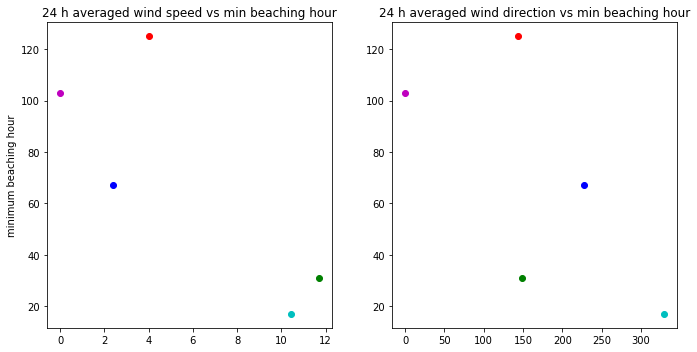

In [38]:
fig, ax = plt.subplots(1, 2, figsize = (10,5))
ax[0].plot(np.mean(SOGs0), np.min(np.ma.masked_equal(SOG350high.variables['Beaching_Time'][:], 0)), 'co')
ax[0].plot(np.mean(SOGs1), np.min(np.ma.masked_equal(SOG350low.variables['Beaching_Time'][:], 0)), 'bo')
ax[0].plot(np.mean(SOGs2), np.min(np.ma.masked_equal(SOG150high.variables['Beaching_Time'][:], 0)),'ro')
ax[0].plot(np.mean(SOGs3), np.min(np.ma.masked_equal(SOG150low.variables['Beaching_Time'][:], 0)),'go')
ax[0].plot(np.mean(SOGs4), np.min(np.ma.masked_equal(SOGzero.variables['Beaching_Time'][:], 0)),'mo')
ax[0].set_title('24 h averaged wind speed vs min beaching hour')
ax[0].set_ylabel('minimum beaching hour')

ax[1].plot(np.mean(SOGd0), np.min(np.ma.masked_equal(SOG350high.variables['Beaching_Time'][:], 0)), 'co', label = 'SOG 350 high')
ax[1].plot(np.mean(SOGd1), np.min(np.ma.masked_equal(SOG350low.variables['Beaching_Time'][:], 0)), 'bo', label = 'SOG 350 low')
ax[1].plot(np.mean(SOGd2), np.min(np.ma.masked_equal(SOG150high.variables['Beaching_Time'][:], 0)),'ro', label = 'SOG 150 high')
ax[1].plot(np.mean(SOGd3), np.min(np.ma.masked_equal(SOG150low.variables['Beaching_Time'][:], 0)),'go', label = 'SOG 150 low')
ax[1].plot(np.mean(SOGd4), np.min(np.ma.masked_equal(SOGzero.variables['Beaching_Time'][:], 0)),'mo', label = 'SOG zero')
ax[1].set_title('24 h averaged wind direction vs min beaching hour')

plt.tight_layout()

# Turn Point

In [33]:
TPs0 = np.array([])
TPs1 = np.array([])
TPs2 = np.array([])
TPs3 = np.array([])
TPs4 = np.array([])

TPd0 = np.array([])
TPd1 = np.array([])
TPd2 = np.array([])
TPd3 = np.array([])
TPd4 = np.array([])

for keyX, keyY in zip(list(SOG350highw['Results']['wind velocity X'].keys())[:24], list(SOG150highw['Results']['wind velocity Y'].keys())[:24]):
    s, d = wind_tools.wind_speed_dir(TP350highw['Results']['wind velocity X'][keyX][249, 342], 
                                     TP350highw['Results']['wind velocity Y'][keyY][249, 342])
    TPs0 = np.append(TPs0, s)
    TPd0 = np.append(TPd0, d)
    
    s, d = wind_tools.wind_speed_dir(TP350loww['Results']['wind velocity X'][keyX][249, 342], 
                                     TP350loww['Results']['wind velocity Y'][keyY][249, 342])
    TPs1 = np.append(TPs1, s)
    TPd1 = np.append(TPd1, d)
    
    s, d = wind_tools.wind_speed_dir(TP150highw['Results']['wind velocity X'][keyX][249, 342], 
                                     TP150highw['Results']['wind velocity Y'][keyY][249, 342])
    TPs2 = np.append(TPs2, s)
    TPd2 = np.append(TPd2, d)
    
    s, d = wind_tools.wind_speed_dir(TP150loww['Results']['wind velocity X'][keyX][249, 342], 
                                     TP150loww['Results']['wind velocity Y'][keyY][249, 342])
    TPs3 = np.append(TPs3, s)
    TPd3 = np.append(TPd3, d)
    
    s, d = wind_tools.wind_speed_dir(zerow['Results']['wind velocity X'][keyX][249, 342], 
                                     zerow['Results']['wind velocity Y'][keyY][249, 342])
    TPs4 = np.append(TPs4, s)
    TPd4 = np.append(TPd4, d)

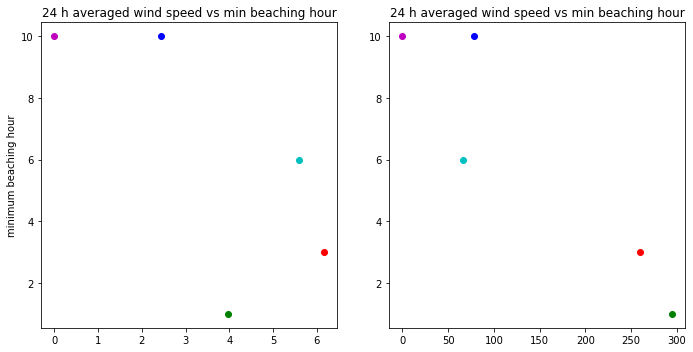

In [39]:
fig, ax = plt.subplots(1, 2, figsize = (10,5))
ax[0].plot(np.mean(TPs0), np.min(np.ma.masked_equal(TP350high.variables['Beaching_Time'][:], 0)), 'co')
ax[0].plot(np.mean(TPs1), np.min(np.ma.masked_equal(TP350low.variables['Beaching_Time'][:], 0)), 'bo')
ax[0].plot(np.mean(TPs2), np.min(np.ma.masked_equal(TP150high.variables['Beaching_Time'][:], 0)),'ro')
ax[0].plot(np.mean(TPs3), np.min(np.ma.masked_equal(TP150low.variables['Beaching_Time'][:], 0)),'go')
ax[0].plot(np.mean(TPs4), np.min(np.ma.masked_equal(TPzero.variables['Beaching_Time'][:], 0)),'mo')
ax[0].set_title('24 h averaged wind speed vs min beaching hour')
ax[0].set_ylabel('minimum beaching hour')


ax[1].plot(np.mean(TPd0), np.min(np.ma.masked_equal(TP350high.variables['Beaching_Time'][:], 0)), 'co', label = 'TP 100 high')
ax[1].plot(np.mean(TPd1), np.min(np.ma.masked_equal(TP350low.variables['Beaching_Time'][:], 0)), 'bo', label = 'TP 100 low')
ax[1].plot(np.mean(TPd2), np.min(np.ma.masked_equal(TP150high.variables['Beaching_Time'][:], 0)),'ro', label = 'TP 270 high')
ax[1].plot(np.mean(TPd3), np.min(np.ma.masked_equal(TP150low.variables['Beaching_Time'][:], 0)),'go', label = 'TP 270 low')
ax[1].plot(np.mean(TPd4), np.min(np.ma.masked_equal(TPzero.variables['Beaching_Time'][:], 0)),'mo', label = 'TP zero')
ax[1].set_title('24 h averaged wind speed vs min beaching hour')

plt.tight_layout()

# Salmon Bank

In [40]:
SBs0 = np.array([])
SBs1 = np.array([])
SBs2 = np.array([])
SBs3 = np.array([])
SBs4 = np.array([])

SBd0 = np.array([])
SBd1 = np.array([])
SBd2 = np.array([])
SBd3 = np.array([])
SBd4 = np.array([])

for keyX, keyY in zip(list(SOG350highw['Results']['wind velocity X'].keys())[:24], list(SOG150highw['Results']['wind velocity Y'].keys())[:24]):
    s, d = wind_tools.wind_speed_dir(SB350highw['Results']['wind velocity X'][keyX][266, 255], 
                                     SB350highw['Results']['wind velocity Y'][keyY][266, 255])
    SBs0 = np.append(SBs0, s)
    SBd0 = np.append(SBd0, d)
    
    s, d = wind_tools.wind_speed_dir(SB350loww['Results']['wind velocity X'][keyX][266, 255], 
                                     SB350loww['Results']['wind velocity Y'][keyY][266, 255])
    SBs1 = np.append(SBs1, s)
    SBd1 = np.append(SBd1, d)
    
    s, d = wind_tools.wind_speed_dir(SB150highw['Results']['wind velocity X'][keyX][266, 255], 
                                     SB150highw['Results']['wind velocity Y'][keyY][266, 255])
    SBs2 = np.append(SBs2, s)
    SBd2 = np.append(SBd2, d)
    
    s, d = wind_tools.wind_speed_dir(SB150loww['Results']['wind velocity X'][keyX][266, 255], 
                                     SB150loww['Results']['wind velocity Y'][keyY][266, 255])
    SBs3 = np.append(SBs3, s)
    SBd3 = np.append(SBd3, d)
    
    s, d = wind_tools.wind_speed_dir(zerow['Results']['wind velocity X'][keyX][266, 255], 
                                     zerow['Results']['wind velocity Y'][keyY][266, 255])
    SBs4 = np.append(SBs4, s)
    SBd4 = np.append(SBd4, d)

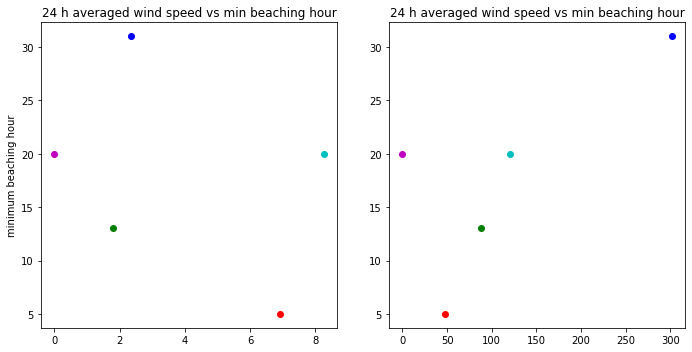

In [41]:
fig, ax = plt.subplots(1, 2, figsize = (10,5))
ax[0].plot(np.mean(SBs0), np.min(np.ma.masked_equal(SB350high.variables['Beaching_Time'][:], 0)), 'co')
ax[0].plot(np.mean(SBs1), np.min(np.ma.masked_equal(SB350low.variables['Beaching_Time'][:], 0)), 'bo')
ax[0].plot(np.mean(SBs2), np.min(np.ma.masked_equal(SB150high.variables['Beaching_Time'][:], 0)),'ro')
ax[0].plot(np.mean(SBs3), np.min(np.ma.masked_equal(SB150low.variables['Beaching_Time'][:], 0)),'go')
ax[0].plot(np.mean(SBs4), np.min(np.ma.masked_equal(SBzero.variables['Beaching_Time'][:], 0)),'mo')
ax[0].set_title('24 h averaged wind speed vs min beaching hour')
ax[0].set_ylabel('minimum beaching hour')


ax[1].plot(np.mean(SBd0), np.min(np.ma.masked_equal(SB350high.variables['Beaching_Time'][:], 0)), 'co', label = 'TP 100 high')
ax[1].plot(np.mean(SBd1), np.min(np.ma.masked_equal(SB350low.variables['Beaching_Time'][:], 0)), 'bo', label = 'TP 100 low')
ax[1].plot(np.mean(SBd2), np.min(np.ma.masked_equal(SB150high.variables['Beaching_Time'][:], 0)),'ro', label = 'TP 270 high')
ax[1].plot(np.mean(SBd3), np.min(np.ma.masked_equal(SB150low.variables['Beaching_Time'][:], 0)),'go', label = 'TP 270 low')
ax[1].plot(np.mean(SBd4), np.min(np.ma.masked_equal(SBzero.variables['Beaching_Time'][:], 0)),'mo', label = 'TP zero')
ax[1].set_title('24 h averaged wind speed vs min beaching hour')

plt.tight_layout()

# Boundary Pass

In [42]:
BPs0 = np.array([])
BPs1 = np.array([])
BPs2 = np.array([])
BPs3 = np.array([])
BPs4 = np.array([])

BPd0 = np.array([])
BPd1 = np.array([])
BPd2 = np.array([])
BPd3 = np.array([])
BPd4 = np.array([])

for keyX, keyY in zip(list(SOG350highw['Results']['wind velocity X'].keys())[:24], list(SOG150highw['Results']['wind velocity Y'].keys())[:24]):
    s, d = wind_tools.wind_speed_dir(BP350highw['Results']['wind velocity X'][keyX][298, 338], 
                                     BP350highw['Results']['wind velocity Y'][keyY][298, 338])
    BPs0 = np.append(BPs0, s)
    BPd0 = np.append(BPd0, d)
    
    s, d = wind_tools.wind_speed_dir(BP350loww['Results']['wind velocity X'][keyX][298, 338], 
                                     BP350loww['Results']['wind velocity Y'][keyY][298, 338])
    BPs1 = np.append(BPs1, s)
    BPd1 = np.append(BPd1, d)
    
    s, d = wind_tools.wind_speed_dir(BP150highw['Results']['wind velocity X'][keyX][298, 338], 
                                     BP150highw['Results']['wind velocity Y'][keyY][298, 338])
    BPs2 = np.append(BPs2, s)
    BPd2 = np.append(BPd2, d)
    
    s, d = wind_tools.wind_speed_dir(BP150loww['Results']['wind velocity X'][keyX][298, 338], 
                                     BP150loww['Results']['wind velocity Y'][keyY][298, 338])
    BPs3 = np.append(BPs3, s)
    BPd3 = np.append(BPd3, d)
    
    s, d = wind_tools.wind_speed_dir(zerow['Results']['wind velocity X'][keyX][298, 338], 
                                     zerow['Results']['wind velocity Y'][keyY][298, 338])
    BPs4 = np.append(BPs4, s)
    BPd4 = np.append(BPd4, d)

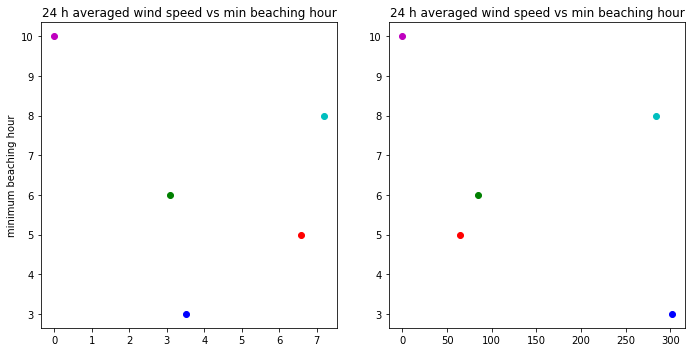

In [43]:
fig, ax = plt.subplots(1, 2, figsize = (10,5))
ax[0].plot(np.mean(BPs0), np.min(np.ma.masked_equal(BP350high.variables['Beaching_Time'][:], 0)), 'co')
ax[0].plot(np.mean(BPs1), np.min(np.ma.masked_equal(BP350low.variables['Beaching_Time'][:], 0)), 'bo')
ax[0].plot(np.mean(BPs2), np.min(np.ma.masked_equal(BP150high.variables['Beaching_Time'][:], 0)),'ro')
ax[0].plot(np.mean(BPs3), np.min(np.ma.masked_equal(BP150low.variables['Beaching_Time'][:], 0)),'go')
ax[0].plot(np.mean(BPs4), np.min(np.ma.masked_equal(BPzero.variables['Beaching_Time'][:], 0)),'mo')
ax[0].set_title('24 h averaged wind speed vs min beaching hour')
ax[0].set_ylabel('minimum beaching hour')


ax[1].plot(np.mean(BPd0), np.min(np.ma.masked_equal(BP350high.variables['Beaching_Time'][:], 0)), 'co', label = 'TP 100 high')
ax[1].plot(np.mean(BPd1), np.min(np.ma.masked_equal(BP350low.variables['Beaching_Time'][:], 0)), 'bo', label = 'TP 100 low')
ax[1].plot(np.mean(BPd2), np.min(np.ma.masked_equal(BP150high.variables['Beaching_Time'][:], 0)),'ro', label = 'TP 270 high')
ax[1].plot(np.mean(BPd3), np.min(np.ma.masked_equal(BP150low.variables['Beaching_Time'][:], 0)),'go', label = 'TP 270 low')
ax[1].plot(np.mean(BPd4), np.min(np.ma.masked_equal(BPzero.variables['Beaching_Time'][:], 0)),'mo', label = 'TP zero')
ax[1].set_title('24 h averaged wind speed vs min beaching hour')

plt.tight_layout()

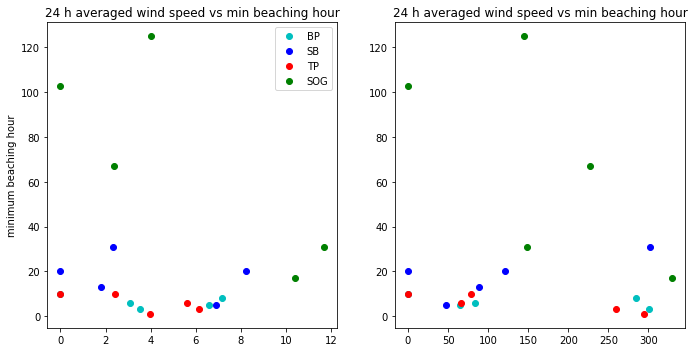

In [46]:
fig, ax = plt.subplots(1, 2, figsize = (10,5))
ax[0].plot(np.mean(BPs0), np.min(np.ma.masked_equal(BP350high.variables['Beaching_Time'][:], 0)), 'co', label = 'BP')
ax[0].plot(np.mean(BPs1), np.min(np.ma.masked_equal(BP350low.variables['Beaching_Time'][:], 0)), 'co')
ax[0].plot(np.mean(BPs2), np.min(np.ma.masked_equal(BP150high.variables['Beaching_Time'][:], 0)),'co')
ax[0].plot(np.mean(BPs3), np.min(np.ma.masked_equal(BP150low.variables['Beaching_Time'][:], 0)),'co')
ax[0].plot(np.mean(BPs4), np.min(np.ma.masked_equal(BPzero.variables['Beaching_Time'][:], 0)),'co')

ax[0].plot(np.mean(SBs0), np.min(np.ma.masked_equal(SB350high.variables['Beaching_Time'][:], 0)), 'bo', label = 'SB')
ax[0].plot(np.mean(SBs1), np.min(np.ma.masked_equal(SB350low.variables['Beaching_Time'][:], 0)), 'bo')
ax[0].plot(np.mean(SBs2), np.min(np.ma.masked_equal(SB150high.variables['Beaching_Time'][:], 0)),'bo')
ax[0].plot(np.mean(SBs3), np.min(np.ma.masked_equal(SB150low.variables['Beaching_Time'][:], 0)),'bo')
ax[0].plot(np.mean(SBs4), np.min(np.ma.masked_equal(SBzero.variables['Beaching_Time'][:], 0)),'bo')

ax[0].plot(np.mean(TPs0), np.min(np.ma.masked_equal(TP350high.variables['Beaching_Time'][:], 0)), 'ro', label = 'TP')
ax[0].plot(np.mean(TPs1), np.min(np.ma.masked_equal(TP350low.variables['Beaching_Time'][:], 0)), 'ro')
ax[0].plot(np.mean(TPs2), np.min(np.ma.masked_equal(TP150high.variables['Beaching_Time'][:], 0)),'ro')
ax[0].plot(np.mean(TPs3), np.min(np.ma.masked_equal(TP150low.variables['Beaching_Time'][:], 0)),'ro')
ax[0].plot(np.mean(TPs4), np.min(np.ma.masked_equal(TPzero.variables['Beaching_Time'][:], 0)),'ro')

ax[0].plot(np.mean(SOGs0), np.min(np.ma.masked_equal(SOG350high.variables['Beaching_Time'][:], 0)), 'go', label = 'SOG')
ax[0].plot(np.mean(SOGs1), np.min(np.ma.masked_equal(SOG350low.variables['Beaching_Time'][:], 0)), 'go')
ax[0].plot(np.mean(SOGs2), np.min(np.ma.masked_equal(SOG150high.variables['Beaching_Time'][:], 0)),'go')
ax[0].plot(np.mean(SOGs3), np.min(np.ma.masked_equal(SOG150low.variables['Beaching_Time'][:], 0)),'go')
ax[0].plot(np.mean(SOGs4), np.min(np.ma.masked_equal(SOGzero.variables['Beaching_Time'][:], 0)),'go')

ax[0].legend()
ax[0].set_title('24 h averaged wind speed vs min beaching hour')
ax[0].set_ylabel('minimum beaching hour')


ax[1].plot(np.mean(BPd0), np.min(np.ma.masked_equal(BP350high.variables['Beaching_Time'][:], 0)), 'co', label = 'TP 100 high')
ax[1].plot(np.mean(BPd1), np.min(np.ma.masked_equal(BP350low.variables['Beaching_Time'][:], 0)), 'co', label = 'TP 100 low')
ax[1].plot(np.mean(BPd2), np.min(np.ma.masked_equal(BP150high.variables['Beaching_Time'][:], 0)),'co', label = 'TP 270 high')
ax[1].plot(np.mean(BPd3), np.min(np.ma.masked_equal(BP150low.variables['Beaching_Time'][:], 0)),'co', label = 'TP 270 low')
ax[1].plot(np.mean(BPd4), np.min(np.ma.masked_equal(BPzero.variables['Beaching_Time'][:], 0)),'co', label = 'TP zero')

ax[1].plot(np.mean(SBd0), np.min(np.ma.masked_equal(SB350high.variables['Beaching_Time'][:], 0)), 'bo')
ax[1].plot(np.mean(SBd1), np.min(np.ma.masked_equal(SB350low.variables['Beaching_Time'][:], 0)), 'bo')
ax[1].plot(np.mean(SBd2), np.min(np.ma.masked_equal(SB150high.variables['Beaching_Time'][:], 0)),'bo')
ax[1].plot(np.mean(SBd3), np.min(np.ma.masked_equal(SB150low.variables['Beaching_Time'][:], 0)),'bo')
ax[1].plot(np.mean(SBd4), np.min(np.ma.masked_equal(SBzero.variables['Beaching_Time'][:], 0)),'bo')

ax[1].plot(np.mean(TPd0), np.min(np.ma.masked_equal(TP350high.variables['Beaching_Time'][:], 0)), 'ro')
ax[1].plot(np.mean(TPd1), np.min(np.ma.masked_equal(TP350low.variables['Beaching_Time'][:], 0)), 'ro')
ax[1].plot(np.mean(TPd2), np.min(np.ma.masked_equal(TP150high.variables['Beaching_Time'][:], 0)),'ro')
ax[1].plot(np.mean(TPd3), np.min(np.ma.masked_equal(TP150low.variables['Beaching_Time'][:], 0)),'ro')
ax[1].plot(np.mean(TPd4), np.min(np.ma.masked_equal(TPzero.variables['Beaching_Time'][:], 0)),'ro')

ax[1].plot(np.mean(SOGd0), np.min(np.ma.masked_equal(SOG350high.variables['Beaching_Time'][:], 0)), 'go')
ax[1].plot(np.mean(SOGd1), np.min(np.ma.masked_equal(SOG350low.variables['Beaching_Time'][:], 0)), 'go')
ax[1].plot(np.mean(SOGd2), np.min(np.ma.masked_equal(SOG150high.variables['Beaching_Time'][:], 0)),'go')
ax[1].plot(np.mean(SOGd3), np.min(np.ma.masked_equal(SOG150low.variables['Beaching_Time'][:], 0)),'go')
ax[1].plot(np.mean(SOGd4), np.min(np.ma.masked_equal(SOGzero.variables['Beaching_Time'][:], 0)),'go')

ax[1].set_title('24 h averaged wind speed vs min beaching hour')

plt.tight_layout()